# EDA - Finding the perfect house for Mr. Zachary Brooks

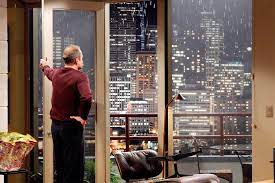

In [3]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# TO DOS
* write rough draft/ todo list of plan with placeholders

* do only simple plots, you should only invest more time in the plots you really want to keep in the end

* main questions should already be answered -> POC (proof of concept)

* iterate: go deeper, go prettier, go better

* clean up .. feel free to delete things that are not useful anymore

* optional: moving code to functions



## <span style="color:black"> __Import the data__ </span>

In [4]:
#import the data from a csv-file
df_import = pd.read_csv('data/eda.csv')

In [5]:
#creating a copy of the dataframe
df = df_import.copy()


In [6]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

## <span style="color:black"> __Understanding the data__ </span>

* Examine the descriptive statistics of the dataset.
* Check for missing values. Are they concentrated in some column or in some observations?
* Check which features are continuous or categorical.

In [7]:
# check which columns are included in our dataframe
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

## <span style="color:black"> __Colum names explanation__ </span> ##


id - unique identified for a house

dateDate - house was sold

pricePrice - is prediction target

bedroomsNumber - # of bedrooms

bathroomsNumber - # of bathrooms

sqft_livingsquare - footage of the home

sqft_lotsquare - footage of the lot

floorsTotal - floors (levels) in house

waterfront - House which has a view to a waterfront

view - quality of view

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zip

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [8]:
#shape of dataset
df.shape

(21597, 21)

There are 21.597 houses to sell.

In [9]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Missing items:

There are missing items in the columns "Waterfront", "view", "sqft_basement", "yr_renovated".

Duplicates: 

There are no duplicates.

In [10]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

Head:

In [11]:
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.00,1.00,"1,180.00","5,650.00",1.00,NaN,0.00,3,7,...,0.00,1955,0.00,98178,47.51,-122.26,"1,340.00","5,650.00",2014-10-13,"221,900.00"
1,6414100192,3.00,2.25,"2,570.00","7,242.00",2.00,0.00,0.00,3,7,...,400.00,1951,"19,910.00",98125,47.72,-122.32,"1,690.00","7,639.00",2014-12-09,"538,000.00"
2,5631500400,2.00,1.00,770.00,"10,000.00",1.00,0.00,0.00,3,6,...,0.00,1933,NaN,98028,47.74,-122.23,"2,720.00","8,062.00",2015-02-25,"180,000.00"
3,2487200875,4.00,3.00,"1,960.00","5,000.00",1.00,0.00,0.00,5,7,...,910.00,1965,0.00,98136,47.52,-122.39,"1,360.00","5,000.00",2014-12-09,"604,000.00"
4,1954400510,3.00,2.00,"1,680.00","8,080.00",1.00,0.00,0.00,3,8,...,0.00,1987,0.00,98074,47.62,-122.05,"1,800.00","7,503.00",2015-02-18,"510,000.00"
5,7237550310,4.00,4.50,"5,420.00","101,930.00",1.00,0.00,0.00,3,11,...,"1,530.00",2001,0.00,98053,47.66,-122.00,"4,760.00","101,930.00",2014-05-12,"1,230,000.00"
6,1321400060,3.00,2.25,"1,715.00","6,819.00",2.00,0.00,0.00,3,7,...,NaN,1995,0.00,98003,47.31,-122.33,"2,238.00","6,819.00",2014-06-27,"257,500.00"
7,2008000270,3.00,1.50,"1,060.00","9,711.00",1.00,0.00,NaN,3,7,...,0.00,1963,0.00,98198,47.41,-122.31,"1,650.00","9,711.00",2015-01-15,"291,850.00"
8,2414600126,3.00,1.00,"1,780.00","7,470.00",1.00,0.00,0.00,3,7,...,730.00,1960,0.00,98146,47.51,-122.34,"1,780.00","8,113.00",2015-04-15,"229,500.00"
9,3793500160,3.00,2.50,"1,890.00","6,560.00",2.00,0.00,0.00,3,7,...,0.00,2003,0.00,98038,47.37,-122.03,"2,390.00","7,570.00",2015-03-12,"323,000.00"


In [12]:
df.tail(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21587,7852140040,3.00,2.50,"2,270.00","5,536.00",2.00,NaN,0.00,3,8,...,0.00,2003,0.00,98065,47.54,-121.88,"2,270.00","5,731.00",2014-08-25,"507,250.00"
21588,9834201367,3.00,2.00,"1,490.00","1,126.00",3.00,0.00,0.00,3,8,...,0.00,2014,0.00,98144,47.57,-122.29,"1,400.00","1,230.00",2015-01-26,"429,000.00"
21589,3448900210,4.00,2.50,"2,520.00","6,023.00",2.00,0.00,NaN,3,9,...,0.00,2014,0.00,98056,47.51,-122.17,"2,520.00","6,023.00",2014-10-14,"610,685.00"
21590,7936000429,4.00,3.50,"3,510.00","7,200.00",2.00,0.00,0.00,3,9,...,910.00,2009,0.00,98136,47.55,-122.40,"2,050.00","6,200.00",2015-03-26,"1,010,000.00"
21591,2997800021,3.00,2.50,"1,310.00","1,294.00",2.00,0.00,0.00,3,8,...,130.00,2008,0.00,98116,47.58,-122.41,"1,330.00","1,265.00",2015-02-19,"475,000.00"
21592,263000018,3.00,2.50,"1,530.00","1,131.00",3.00,0.00,0.00,3,8,...,0.00,2009,0.00,98103,47.70,-122.35,"1,530.00","1,509.00",2014-05-21,"360,000.00"
21593,6600060120,4.00,2.50,"2,310.00","5,813.00",2.00,0.00,0.00,3,8,...,0.00,2014,0.00,98146,47.51,-122.36,"1,830.00","7,200.00",2015-02-23,"400,000.00"
21594,1523300141,2.00,0.75,"1,020.00","1,350.00",2.00,0.00,0.00,3,7,...,0.00,2009,0.00,98144,47.59,-122.30,"1,020.00","2,007.00",2014-06-23,"402,101.00"
21595,291310100,3.00,2.50,"1,600.00","2,388.00",2.00,NaN,0.00,3,8,...,0.00,2004,0.00,98027,47.53,-122.07,"1,410.00","1,287.00",2015-01-16,"400,000.00"
21596,1523300157,2.00,0.75,"1,020.00","1,076.00",2.00,0.00,0.00,3,7,...,0.00,2008,0.00,98144,47.59,-122.30,"1,020.00","1,357.00",2014-10-15,"325,000.00"


In [13]:
# type of first date entry
type(df['yr_built'][3])

numpy.int64

In [14]:
df.date.nunique

<bound method IndexOpsMixin.nunique of 0        2014-10-13
1        2014-12-09
2        2015-02-25
3        2014-12-09
4        2015-02-18
            ...    
21592    2014-05-21
21593    2015-02-23
21594    2014-06-23
21595    2015-01-16
21596    2014-10-15
Name: date, Length: 21597, dtype: object>

In [15]:
# change "date" dtype to datetime with format %Y/%m/%d
df['date'] = pd.to_datetime(df['date']) #format='%Y/%m/%d')

In [16]:
#Creating a column "month"
df['month']=df.date.dt.month

In [17]:
#Creating a column "year"
df['year']=df.date.dt.year

In [18]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year
0,7129300520,3.00,1.00,"1,180.00","5,650.00",1.00,NaN,0.00,3,7,...,0.00,98178,47.51,-122.26,"1,340.00","5,650.00",2014-10-13,"221,900.00",10,2014
1,6414100192,3.00,2.25,"2,570.00","7,242.00",2.00,0.00,0.00,3,7,...,"19,910.00",98125,47.72,-122.32,"1,690.00","7,639.00",2014-12-09,"538,000.00",12,2014
2,5631500400,2.00,1.00,770.00,"10,000.00",1.00,0.00,0.00,3,6,...,NaN,98028,47.74,-122.23,"2,720.00","8,062.00",2015-02-25,"180,000.00",2,2015
3,2487200875,4.00,3.00,"1,960.00","5,000.00",1.00,0.00,0.00,5,7,...,0.00,98136,47.52,-122.39,"1,360.00","5,000.00",2014-12-09,"604,000.00",12,2014
4,1954400510,3.00,2.00,"1,680.00","8,080.00",1.00,0.00,0.00,3,8,...,0.00,98074,47.62,-122.05,"1,800.00","7,503.00",2015-02-18,"510,000.00",2,2015


Cleaning the column "waterfront" & changing to int

In [19]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [20]:
df.waterfront.replace(np.nan, 0,inplace=True)

In [21]:
# convert to dtype "integer"
df['waterfront'] = df.waterfront.astype('int')
df.yr_renovated.dtype

dtype('float64')

Cleaning the column "yr_renovated" & changing to int

In [22]:
df['yr_renovated']= df_import.yr_renovated

In [23]:
df['yr_renovated'] = df.yr_renovated/10

In [24]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year
0,7129300520,3.00,1.00,"1,180.00","5,650.00",1.00,0,0.00,3,7,...,0.00,98178,47.51,-122.26,"1,340.00","5,650.00",2014-10-13,"221,900.00",10,2014
1,6414100192,3.00,2.25,"2,570.00","7,242.00",2.00,0,0.00,3,7,...,"1,991.00",98125,47.72,-122.32,"1,690.00","7,639.00",2014-12-09,"538,000.00",12,2014
2,5631500400,2.00,1.00,770.00,"10,000.00",1.00,0,0.00,3,6,...,NaN,98028,47.74,-122.23,"2,720.00","8,062.00",2015-02-25,"180,000.00",2,2015
3,2487200875,4.00,3.00,"1,960.00","5,000.00",1.00,0,0.00,5,7,...,0.00,98136,47.52,-122.39,"1,360.00","5,000.00",2014-12-09,"604,000.00",12,2014
4,1954400510,3.00,2.00,"1,680.00","8,080.00",1.00,0,0.00,3,8,...,0.00,98074,47.62,-122.05,"1,800.00","7,503.00",2015-02-18,"510,000.00",2,2015


In [25]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [26]:
df.yr_renovated.replace(np.nan, 0, inplace=True)

In [27]:
# convert to dtype "integer"
df['yr_renovated'] = df.yr_renovated.astype('int')
df.yr_renovated.dtype

dtype('int64')

Changing the missing data: If there is no renovation, the year of renovation is the year of building

In [28]:
df.loc[df['yr_renovated']==0,'yr_renovated'] = df['yr_built']

In [29]:
df.loc[df['yr_renovated']==0,'yr_renovated']

Series([], Name: yr_renovated, dtype: int64)

Creating a new column "lry" (last renovation in years): last renovation / how many years ago

In [30]:
#new column: lry (last renovation in years)
df['lry']= df.yr_renovated-df.yr_built

In [31]:
df[['yr_built', 'yr_renovated','lry' ]]

,yr_built,yr_renovated,lry
0,1955,1955,0
1,1951,1991,40
2,1933,1933,0
3,1965,1965,0
4,1987,1987,0
...,...,...,...
21592,2009,2009,0
21593,2014,2014,0
21594,2009,2009,0
21595,2004,2004,0


In [32]:

df[['yr_built', 'waterfront','zipcode' ]]

,yr_built,waterfront,zipcode
0,1955,0,98178
1,1951,0,98125
2,1933,0,98028
3,1965,0,98136
4,1987,0,98074
...,...,...,...
21592,2009,0,98103
21593,2014,0,98146
21594,2009,0,98144
21595,2004,0,98027


In [33]:
df[['yr_built', 'waterfront','zipcode' ]].value_counts

<bound method DataFrame.value_counts of        yr_built  waterfront  zipcode
0          1955           0    98178
1          1951           0    98125
2          1933           0    98028
3          1965           0    98136
4          1987           0    98074
...         ...         ...      ...
21592      2009           0    98103
21593      2014           0    98146
21594      2009           0    98144
21595      2004           0    98027
21596      2008           0    98144

[21597 rows x 3 columns]>

## <span style="color:black"> __Mr. Brooks, welcome to your new house!__ </span> ##

Who is Mr. Brooks?

Zachary Brooks/Seller:

REQUIREMENTS:

1. Invests in historical houses
2. Best neighbourhouds
3. High profit
4. Best timing within a year
5. Renovation?

## <span style="color:black"> __ASSUMPTIONS__ </span> ##

## <span style="color:black"> __1. Historical houses__ </span> ##

What is a "historical house"? There are different definitions.

One definition: A historic house must be at least 50 years old & the property must be relativly unchanged.


Let´s take a look at american architecture ...

There are different Styles, e.g.:
Historizm (victorian architechture etc.): 1880-1940
Midcentury-modern: 1940-1960

#For Mr. Brooks, let´s assume he wants a house, which is at least 100 years old, so the year of construction is 1924 or less.


# EXPLORING THE DATA:

# 1. Historical Houses
Let´s explore houses that are at least 100 years old!

In [34]:
#Building a new dataframe for historical houses (<1924)
df_hh = df[df.yr_built < 1924]
df_hh


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
14,1175000570,5.00,2.00,"1,810.00","4,850.00",1.50,0,0.00,3,7,...,98107,47.67,-122.39,"1,360.00","4,850.00",2015-03-12,"530,000.00",3,2015,0
17,6865200140,4.00,1.00,"1,600.00","4,300.00",1.50,0,0.00,4,7,...,98103,47.66,-122.34,"1,610.00","4,300.00",2014-05-29,"485,000.00",5,2014,0
18,16000397,2.00,1.00,"1,200.00","9,850.00",1.00,0,0.00,4,7,...,98002,47.31,-122.21,"1,060.00","5,095.00",2014-12-05,"189,000.00",12,2014,0
26,1794500383,3.00,1.75,"2,450.00","2,691.00",2.00,0,0.00,3,8,...,98119,47.64,-122.36,"1,760.00","3,573.00",2014-06-26,"937,000.00",6,2014,0
27,3303700376,3.00,1.00,"1,400.00","1,581.00",1.50,0,0.00,5,8,...,98112,47.62,-122.31,"1,860.00","3,861.00",2014-12-01,"667,000.00",12,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19547,42000245,4.00,2.00,"1,520.00","19,672.00",1.00,0,0.00,3,6,...,98188,47.47,-122.28,"1,810.00","7,840.00",2014-06-13,"171,000.00",6,2014,0
19582,7518507685,3.00,1.00,"1,100.00","5,100.00",2.00,0,0.00,4,7,...,98117,47.68,-122.39,"1,540.00","5,100.00",2015-02-23,"400,000.00",2,2015,0
20567,9151600055,4.00,2.75,"2,700.00","6,000.00",2.00,0,0.00,4,8,...,98116,47.59,-122.38,"2,050.00","5,400.00",2014-07-09,"749,000.00",7,2014,0
21027,9276200220,1.00,1.00,720.00,"3,166.00",1.00,0,0.00,3,6,...,98116,47.58,-122.39,"1,140.00","6,250.00",2014-07-17,"375,000.00",7,2014,0


More than 1.800 houses - Seattle is a great place for finding a historical house!

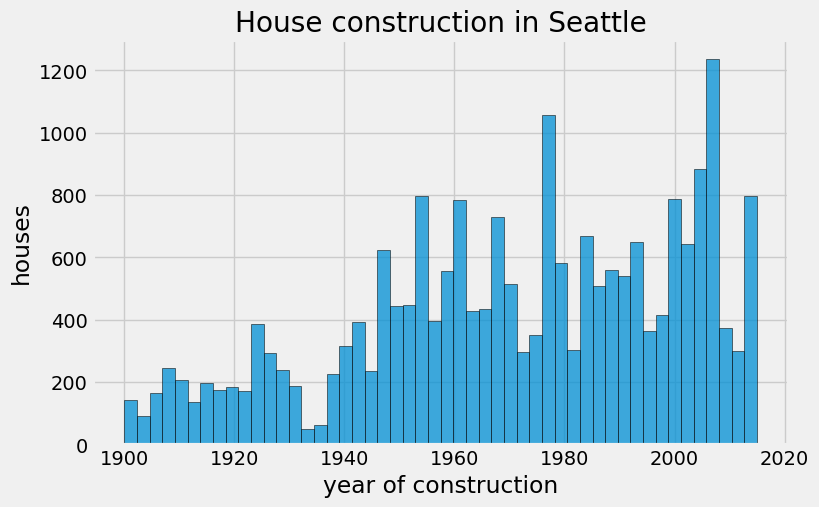

In [52]:
df['yr_built'].plot(kind='hist',xlabel='year of construction', ylabel='houses', bins=50, alpha=0.75, edgecolor='black', title="House construction in Seattle")
plt.savefig('house_construction.jpg', format='jpg')

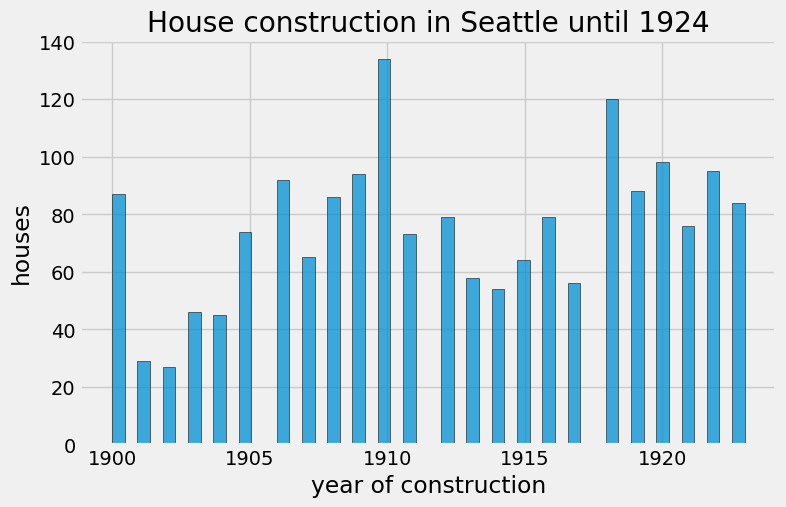

In [53]:
df_hh['yr_built'].plot(kind='hist',xlabel='year of construction', ylabel='houses', bins=50, alpha=0.75, edgecolor='black', title='House construction in Seattle until 1924')
plt.savefig('house_construction_1924new.jpg', format='jpg')

Is there a correlation between sqft_lot15 and the price or sqft_living15 and the price?

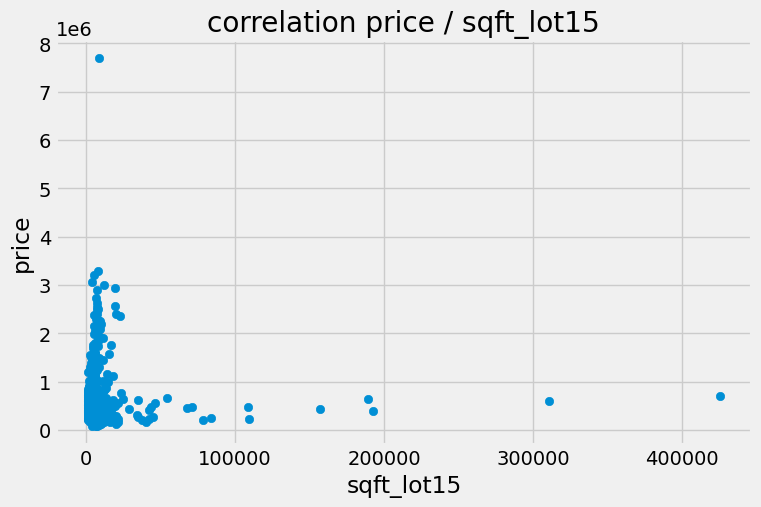

<Figure size 800x500 with 0 Axes>

In [55]:
# create a scatterplot
plt.scatter(df_hh['sqft_lot15'], df_hh['price'])
plt.title('correlation price / sqft_lot15') 
plt.xlabel('sqft_lot15') 
plt.ylabel('price') 
plt.show()
plt.savefig('correlation_price_sqft_lot15.jpg', format='jpg')

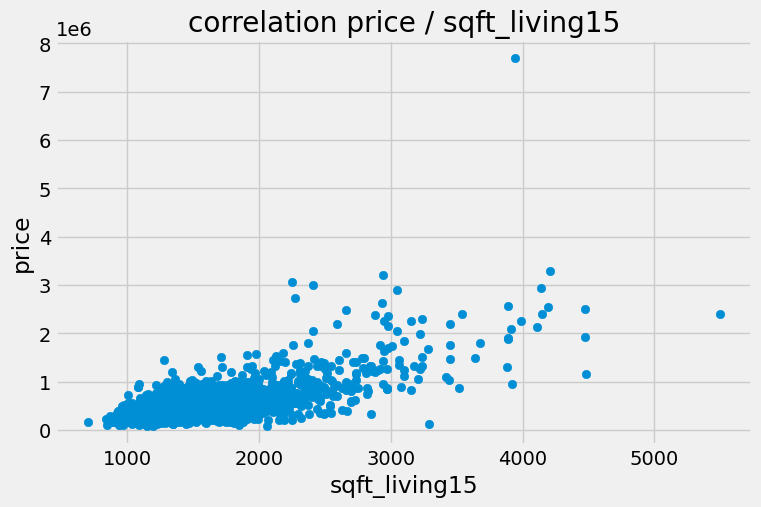

<Figure size 800x500 with 0 Axes>

In [56]:
# create a scatterplot
plt.scatter(df_hh['sqft_living15'], df_hh['price'])
plt.title('correlation price / sqft_living15') 
plt.xlabel('sqft_living15') 
plt.ylabel('price') 
plt.show()
plt.savefig('correlation_price_sqft_living15.jpg', format='jpg')

If the zipcode is closer the citycenter or historical sights, there are more historical houses/ historic district 
See if all old houses have the same zipcode (Millionaire`s street ...)

Also, if the house is located to water, it is liklier to be a historical house (summer resicence at the waterfront)


2. Best Neighbourhood:

If the price of the house is higher, then the neighbourhoud is better. 
If the size of the houses close to our house is big (sqft_lot15), then it´s a good neigbourhoud (with villas instead of small flats).


3. High profit:

If the condition is bad, the price will be more attractive.
If the grade is low, the price will be more attractive.
If the house hasn´t been renovated in the past xy years, the price will be more attractive.


Also take a look on sold houses??? And sold historical houses - whch houses are very popular (e.g. with waterfront, big size etc.) 

As Mr. Brooks is a seller, he can fix & flip (buy cheap, renovate & sell) to get the highest profit.

4. Best time within a year:

If there is a month where a lot houses are sold, it will be sold cheaper.


5. Renovation:

Is an option, probably also recommended because of the profit.


# 2. BEST NEIGHBOURHOOD

In [37]:
df_hh.groupby(['zipcode', 'price']).count().sort_values('id',ascending=False)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode price                                                                  
98103   700,000.00     5         5          5            5         5       5   
        549,000.00     4         4          4            4         4       4   
98112   1,330,000.00   4         4          4            4         4       4   
98103   875,000.00     4         4          4            4         4       4   
        475,000.00     4         4          4            4         4       4   
...                   ..       ...        ...          ...       ...     ...   
98108   319,500.00     1         1          1            1         1       1   
        315,450.00     1         1          1            1         1       1   
        315,000.00     1         1          1            1         1       1   
        311,000.00     1         1          1            1         1       1   
98199   1,810,000.00   1         1          1            1         1       1   

                      waterfront  view  condition  grade  ...  yr_built  \
zipcode price                                             ...             
98103   700,000.00             5     5          5      5  ...         5   
        549,000.00             4     4          4      4  ...         4   
98112   1,330,000.00           4     4          4      4  ...         4   
98103   875,000.00             4     4          4      4  ...         4   
        475,000.00             4     4          4      4  ...         4   
...                          ...   ...        ...    ...  ...       ...   
98108   319,500.00             1     1          1      1  ...         1   
        315,450.00             1     1          1      1  ...         1   
        315,000.00             1     1          1      1  ...         1   
        311,000.00             1     1          1      1  ...         1   
98199   1,810,000.00           1     1          1      1  ...         1   

                      yr_renovated  lat  long  sqft_living15  sqft_lot15  \
zipcode price                                                              
98103   700,000.00               5    5     5              5           5   
        549,000.00               4    4     4              4           4   
98112   1,330,000.00             4    4     4              4           4   
98103   875,000.00               4    4     4              4           4   
        475,000.00               4    4     4              4           4   
...                            ...  ...   ...            ...         ...   
98108   319,500.00               1    1     1              1           1   
        315,450.00               1    1     1              1           1   
        315,000.00               1    1     1              1           1   
        311,000.00               1    1     1              1           1   
98199   1,810,000.00             1    1     1              1           1   

                      date  month  year  lry  
zipcode price                                 
98103   700,000.00       5      5     5    5  
        549,000.00       4      4     4    4  
98112   1,330,000.00     4      4     4    4  
98103   875,000.00       4      4     4    4  
        475,000.00       4      4     4    4  
...                    ...    ...   ...  ...  
98108   319,500.00       1      1     1    1  
        315,450.00       1      1     1    1  
        315,000.00       1      1     1    1  
        311,000.00       1      1     1    1  
98199   1,810,000.00     1      1     1    1  

[1585 rows x 22 columns]

In [ ]:
#Zipcode with median price, with best prices in zipcodes and top land lots of neighbours
zipcode_median_price = df_hh.groupby('zipcode').median().sort_values('price', ascending=False)[['price', 'sqft_lot15']].reset_index()
zipcode_median_price

,zipcode,price,sqft_lot15
0,98040,"1,900,000.00","11,489.00"
1,98004,"1,570,000.00","14,963.00"
2,98039,"1,160,000.00","14,406.00"
3,98112,"875,000.00","4,760.00"
4,98102,"810,000.00","4,000.00"
...,...,...,...
56,98002,"200,000.00","6,480.00"
57,98014,"190,000.00","7,500.00"
58,98001,"187,925.00","11,127.50"
59,98032,"176,500.00","6,000.00"


In [ ]:
#Just for comparison: like above, but with top sqf living interior
zipcode_median_price_interior = df_hh.groupby('zipcode').median().sort_values('price', ascending=False)[['price', 'sqft_living15']].reset_index()
zipcode_median_price_interior

,zipcode,price,sqft_living15
0,98040,"1,900,000.00","3,890.00"
1,98004,"1,570,000.00","2,410.00"
2,98039,"1,160,000.00","4,480.00"
3,98112,"875,000.00","2,130.00"
4,98102,"810,000.00","1,890.00"
...,...,...,...
56,98002,"200,000.00","1,070.00"
57,98014,"190,000.00","1,200.00"
58,98001,"187,925.00","1,360.00"
59,98032,"176,500.00",930.00


In [ ]:
#count for zipcodes
zipcode_count = pd.DataFrame(df_hh.groupby('zipcode').count()['id']).reset_index()


In [ ]:
#Best Neighbourhood Zipcode: Merging the zipcode with median price with zipcode counts
zipcode_bn = pd.merge(zipcode_median_price, zipcode_count, on = 'zipcode')
zipcode_bn.rename({'id': 'counts'}, axis=1, inplace=True)
zipcode_bn

,zipcode,price,sqft_lot15,counts
0,98040,"1,900,000.00","11,489.00",1
1,98004,"1,570,000.00","14,963.00",7
2,98039,"1,160,000.00","14,406.00",1
3,98112,"875,000.00","4,760.00",99
4,98102,"810,000.00","4,000.00",47
...,...,...,...,...
56,98002,"200,000.00","6,480.00",25
57,98014,"190,000.00","7,500.00",7
58,98001,"187,925.00","11,127.50",10
59,98032,"176,500.00","6,000.00",5


<Axes: >

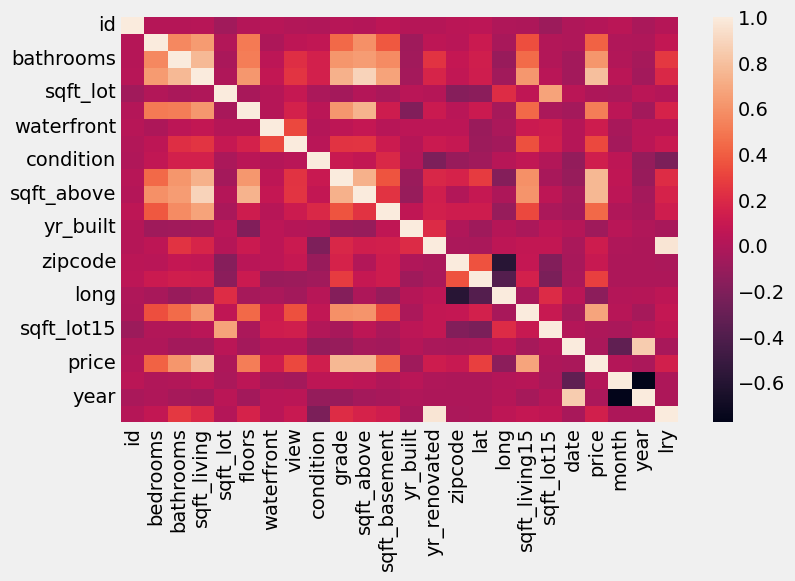

In [ ]:
sns.heatmap(df.corr())

In [44]:
#Top 20 Zipcodes for best neighbourhoud
zipcode_bn_top20 = zipcode_bn.head(20).sort_values('price', ascending=False)
zipcode_bn_top20 

,zipcode,price,sqft_lot15,counts
0,98040,"1,900,000.00","11,489.00",1
1,98004,"1,570,000.00","14,963.00",7
2,98039,"1,160,000.00","14,406.00",1
3,98112,"875,000.00","4,760.00",99
4,98102,"810,000.00","4,000.00",47
5,98119,"804,125.00","3,600.00",80
6,98109,"770,000.00","4,000.00",45
7,98074,"721,000.00","15,542.00",2
8,98033,"619,500.00","8,207.00",11
9,98105,"618,000.00","4,080.00",71


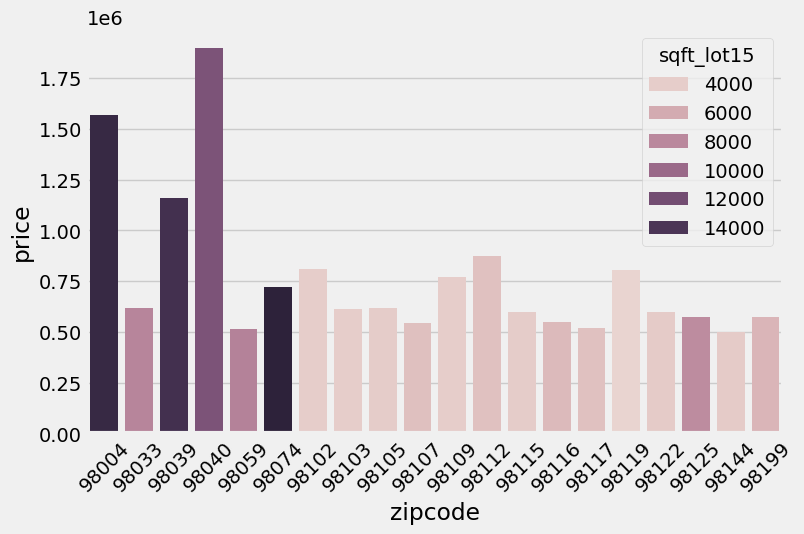

In [57]:
#Zipcode / median price /
fig, ax= plt.subplots()
sns.barplot(data=zipcode_bn_top20, x= 'zipcode', y='price', hue='sqft_lot15', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.savefig('Top20_zipcodes_price_sqft_lot15.jpg', format='jpg')



In [48]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [77]:
avg_latitude = df_hh['lat'].mean() # starting point - exact locations not important
avg_longitude = df_hh['long'].mean()
import geojson
import plotly.express as px
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/refs/heads/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(df_hh, 
                           geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           color='price',
                           mapbox_style="carto-positron",
                           zoom=8, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=400,
                           width=600, 
                          )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2 = px.scatter_mapbox(df_hh[df_hh.zipcode.isin([98004, 98039, 98040])], lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
for trace in fig2.data:
    fig.add_trace(trace)
fig.show()

import plotly.io as pio

#fig.write_image("img.png")

In [114]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
hh_top9 = df_hh[df_hh.zipcode.isin([98004, 98039, 98040])]
hh_top9

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
125,4389200955,4.00,2.75,"2,750.00","17,789.00",1.50,0,0.00,3,8,...,98004,47.61,-122.21,"3,060.00","11,275.00",2015-03-02,"1,450,000.00",3,2015,78
2897,9808100100,5.00,3.25,"5,370.00","14,091.00",2.00,0,0.00,3,10,...,98004,47.65,-122.22,"2,410.00","12,047.00",2015-02-02,"3,000,000.00",2,2015,90
5173,6447300345,4.00,3.00,"2,680.00","15,438.00",2.00,0,2.00,3,8,...,98039,47.61,-122.23,"4,480.00","14,406.00",2015-04-06,"1,160,000.00",4,2015,54
7879,3024059014,4.00,2.25,"3,020.00","11,489.00",1.50,1,3.00,5,10,...,98040,47.54,-122.21,"3,890.00","11,489.00",2015-03-25,"1,900,000.00",3,2015,0
8380,4389201021,3.00,1.00,"1,640.00","12,855.00",1.50,0,0.00,5,6,...,98004,47.62,-122.21,"2,190.00","11,262.00",2014-07-01,"1,010,000.00",7,2014,0
12700,853200040,5.00,2.50,"4,600.00","23,250.00",1.50,0,2.00,3,9,...,98004,47.62,-122.22,"5,500.00","20,066.00",2015-04-28,"2,410,000.00",4,2015,85
12813,3025059072,4.00,2.50,"3,910.00","22,710.00",1.50,0,0.00,3,8,...,98004,47.63,-122.22,"2,920.00","16,544.00",2014-07-25,"1,750,000.00",7,2014,95
14593,629000704,4.00,2.00,"1,780.00","15,648.00",1.50,0,0.00,5,8,...,98004,47.58,-122.20,"2,320.00","14,963.00",2014-07-29,"1,000,000.00",7,2014,0
15878,4389200876,4.00,2.75,"2,970.00","12,750.00",1.50,0,1.00,4,7,...,98004,47.61,-122.21,"1,980.00","15,300.00",2014-07-01,"1,570,000.00",7,2014,0


# FINAL LIST

In [92]:
#Top not renovated
hh_top9_nonrenovated = hh_top9[hh_top9.lry != 0]
hh_top9_nonrenovated

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
125,4389200955,4.00,2.75,"2,750.00","17,789.00",1.50,0,0.00,3,8,...,98004,47.61,-122.21,"3,060.00","11,275.00",2015-03-02,"1,450,000.00",3,2015,78
2897,9808100100,5.00,3.25,"5,370.00","14,091.00",2.00,0,0.00,3,10,...,98004,47.65,-122.22,"2,410.00","12,047.00",2015-02-02,"3,000,000.00",2,2015,90
5173,6447300345,4.00,3.00,"2,680.00","15,438.00",2.00,0,2.00,3,8,...,98039,47.61,-122.23,"4,480.00","14,406.00",2015-04-06,"1,160,000.00",4,2015,54
12700,853200040,5.00,2.50,"4,600.00","23,250.00",1.50,0,2.00,3,9,...,98004,47.62,-122.22,"5,500.00","20,066.00",2015-04-28,"2,410,000.00",4,2015,85
12813,3025059072,4.00,2.50,"3,910.00","22,710.00",1.50,0,0.00,3,8,...,98004,47.63,-122.22,"2,920.00","16,544.00",2014-07-25,"1,750,000.00",7,2014,95


# Final Top 3 not renovated

In [ ]:
# Top not renovated - top size (sqft_living, more than 3000 sqm)
big_nr = hh_top9_nonrenovated[hh_top9_nonrenovated.sqft_living > 3000.00]
big_nr

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
2897,9808100100,5.00,3.25,"5,370.00","14,091.00",2.00,0,0.00,3,10,...,98004,47.65,-122.22,"2,410.00","12,047.00",2015-02-02,"3,000,000.00",2,2015,90
12700,853200040,5.00,2.50,"4,600.00","23,250.00",1.50,0,2.00,3,9,...,98004,47.62,-122.22,"5,500.00","20,066.00",2015-04-28,"2,410,000.00",4,2015,85
12813,3025059072,4.00,2.50,"3,910.00","22,710.00",1.50,0,0.00,3,8,...,98004,47.63,-122.22,"2,920.00","16,544.00",2014-07-25,"1,750,000.00",7,2014,95


In [109]:
results_big_nr = big_nr[['id', 'price','sqft_living', 'sqft_lot','condition', 'grade', 'zipcode', 'view', 'waterfront',]]
results_big_nr

,id,price,sqft_living,sqft_lot,condition,grade,zipcode,view,waterfront
2897,9808100100,"3,000,000.00","5,370.00","14,091.00",3,10,98004,0.00,0
12700,853200040,"2,410,000.00","4,600.00","23,250.00",3,9,98004,2.00,0
12813,3025059072,"1,750,000.00","3,910.00","22,710.00",3,8,98004,0.00,0


# TOP RENOVATED

In [ ]:
# Top renovated

hh_top9_renovated = hh_top9[hh_top9.lry == 0]
hh_top9_renovated

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
7879,3024059014,4.00,2.25,"3,020.00","11,489.00",1.50,1,3.00,5,10,...,98040,47.54,-122.21,"3,890.00","11,489.00",2015-03-25,"1,900,000.00",3,2015,0
8380,4389201021,3.00,1.00,"1,640.00","12,855.00",1.50,0,0.00,5,6,...,98004,47.62,-122.21,"2,190.00","11,262.00",2014-07-01,"1,010,000.00",7,2014,0
14593,629000704,4.00,2.00,"1,780.00","15,648.00",1.50,0,0.00,5,8,...,98004,47.58,-122.20,"2,320.00","14,963.00",2014-07-29,"1,000,000.00",7,2014,0
15878,4389200876,4.00,2.75,"2,970.00","12,750.00",1.50,0,1.00,4,7,...,98004,47.61,-122.21,"1,980.00","15,300.00",2014-07-01,"1,570,000.00",7,2014,0


In [99]:
#Top- renovated - top condition
top_cd = hh_top9_renovated[hh_top9_renovated.condition >= 5]
top_cd 

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
7879,3024059014,4.00,2.25,"3,020.00","11,489.00",1.50,1,3.00,5,10,...,98040,47.54,-122.21,"3,890.00","11,489.00",2015-03-25,"1,900,000.00",3,2015,0
8380,4389201021,3.00,1.00,"1,640.00","12,855.00",1.50,0,0.00,5,6,...,98004,47.62,-122.21,"2,190.00","11,262.00",2014-07-01,"1,010,000.00",7,2014,0
14593,629000704,4.00,2.00,"1,780.00","15,648.00",1.50,0,0.00,5,8,...,98004,47.58,-122.20,"2,320.00","14,963.00",2014-07-29,"1,000,000.00",7,2014,0


In [100]:
top_cd.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'month', 'year', 'lry'],
      dtype='object')

# FINAL Top 3 renovated
condition minimum 5

In [107]:
results_top_cd = top_cd[['id', 'price','sqft_living', 'sqft_lot','condition', 'grade', 'zipcode', 'view', 'waterfront',]]
results_top_cd 

,id,price,sqft_living,sqft_lot,condition,grade,zipcode,view,waterfront
7879,3024059014,"1,900,000.00","3,020.00","11,489.00",5,10,98040,3.00,1
8380,4389201021,"1,010,000.00","1,640.00","12,855.00",5,6,98004,0.00,0
14593,629000704,"1,000,000.00","1,780.00","15,648.00",5,8,98004,0.00,0


In [ ]:
#Best 10 Zipcode
zipcode_best = df_hh.groupby('zipcode').median().sort_values('price', ascending=False)['price']
zipcode_best10 = pd.DataFrame(zipcode_best).head(10)
zipcode_best10


,price
zipcode,
98040,"1,900,000.00"
98004,"1,570,000.00"
98039,"1,160,000.00"
98112,"875,000.00"
98102,"810,000.00"
98119,"804,125.00"
98109,"770,000.00"
98074,"721,000.00"
98033,"619,500.00"



Is there a correlation between the age and the price?

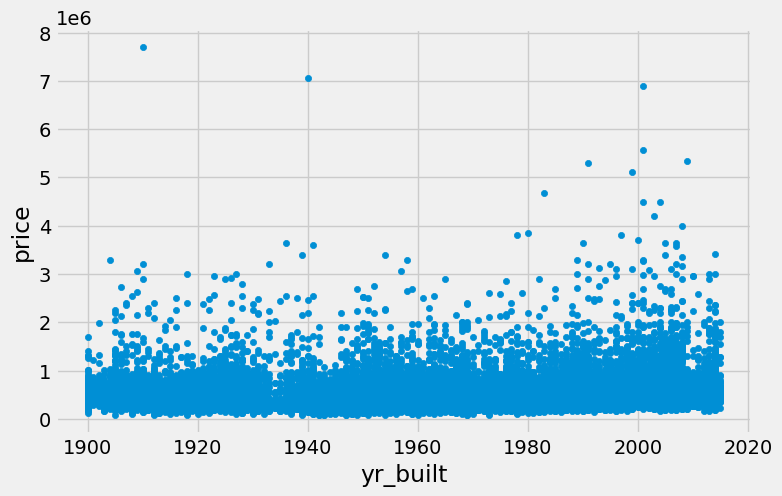

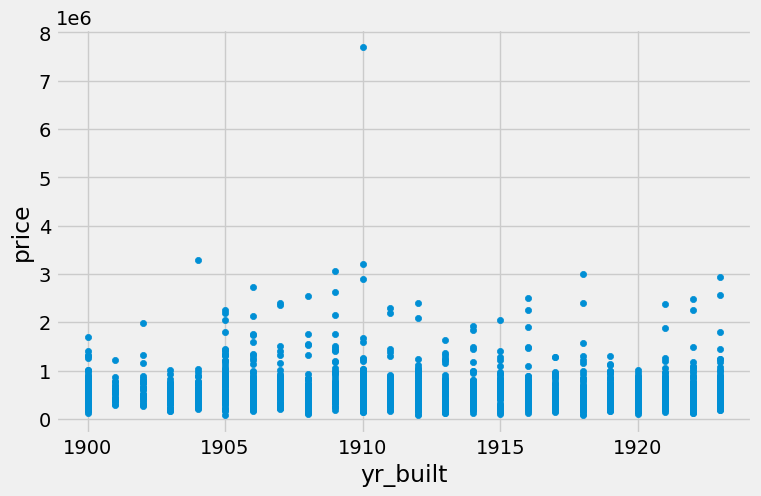

In [64]:
df.plot(kind='scatter', x='yr_built', y='price')
df_hh.plot(kind='scatter', x='yr_built', y='price')

plt.savefig('correlation_age_price.jpg')


If the zipcode is closer the citycenter or historical sights, there are more historical houses/ historic district 
See if all old houses have the same zipcode (Millionaire`s street ...)


# 2. Best Neighbourhood:
If the price of the house is higher, then the neighbourhoud is better. take the zipcodes with most houses in upper 10% percentile.


If the size of the houses close to our house is big (sqft_lot15), then it´s a good neigbourhoud (with villas instead of small flats).

If they have also waterfront, they are special.


3. High profit:

If the house isn´t renovated, the price is more attractive.
If the condition is bad, the price will be more attractive.
If the grade is low, the price will be more attractive.

As Mr. Brooks is a seller, he can fix & flip (buy cheap, renovate & sell) to get the highest profit.

In [59]:
df_hh[df_hh.lry == 0].median()['price']

np.float64(520000.0)

In [60]:
df_hh[df_hh.lry != 0].median()['price']

np.float64(599000.0)

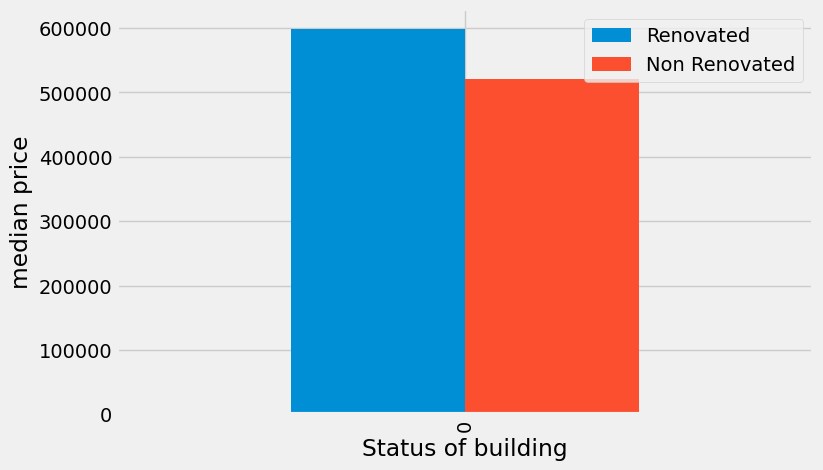

In [65]:
pd.DataFrame({'Renovated':[df_hh[df_hh.lry != 0].median()['price']],'Non Renovated': [df_hh[df_hh.lry == 0].median()['price']]}).plot.bar()
plt.xlabel('Status of building')
plt.ylabel('median price')

plt.savefig('renovation_status_price.jpg', format='jpg')

In [84]:
df_hh[df_hh.lry == 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,year,lry
14,1175000570,5.00,2.00,"1,810.00","4,850.00",1.50,0,0.00,3,7,...,98107,47.67,-122.39,"1,360.00","4,850.00",2015-03-12,"530,000.00",3,2015,0
17,6865200140,4.00,1.00,"1,600.00","4,300.00",1.50,0,0.00,4,7,...,98103,47.66,-122.34,"1,610.00","4,300.00",2014-05-29,"485,000.00",5,2014,0
18,16000397,2.00,1.00,"1,200.00","9,850.00",1.00,0,0.00,4,7,...,98002,47.31,-122.21,"1,060.00","5,095.00",2014-12-05,"189,000.00",12,2014,0
26,1794500383,3.00,1.75,"2,450.00","2,691.00",2.00,0,0.00,3,8,...,98119,47.64,-122.36,"1,760.00","3,573.00",2014-06-26,"937,000.00",6,2014,0
27,3303700376,3.00,1.00,"1,400.00","1,581.00",1.50,0,0.00,5,8,...,98112,47.62,-122.31,"1,860.00","3,861.00",2014-12-01,"667,000.00",12,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19547,42000245,4.00,2.00,"1,520.00","19,672.00",1.00,0,0.00,3,6,...,98188,47.47,-122.28,"1,810.00","7,840.00",2014-06-13,"171,000.00",6,2014,0
19582,7518507685,3.00,1.00,"1,100.00","5,100.00",2.00,0,0.00,4,7,...,98117,47.68,-122.39,"1,540.00","5,100.00",2015-02-23,"400,000.00",2,2015,0
20567,9151600055,4.00,2.75,"2,700.00","6,000.00",2.00,0,0.00,4,8,...,98116,47.59,-122.38,"2,050.00","5,400.00",2014-07-09,"749,000.00",7,2014,0
21027,9276200220,1.00,1.00,720.00,"3,166.00",1.00,0,0.00,3,6,...,98116,47.58,-122.39,"1,140.00","6,250.00",2014-07-17,"375,000.00",7,2014,0


# 4. Best time within a year:

If there is a month where a lot houses are sold, it will be sold cheaper.

Let´s compare the different months of a year:

In [62]:
# In general: house prices / month
df.groupby('month').price.mean()

month
1    525,963.25
2    508,520.05
3    544,057.68
4    562,215.62
5    550,849.75
6    557,534.32
7    544,892.16
8    536,655.21
9    529,723.52
10   539,439.45
11   522,359.90
12   524,799.90
Name: price, dtype: float64

In [63]:
df.groupby('month').price.median()

month
1    438,500.00
2    426,500.00
3    450,000.00
4    477,000.00
5    462,000.00
6    465,000.00
7    465,000.00
8    442,200.00
9    450,000.00
10   447,000.00
11   435,000.00
12   432,500.00
Name: price, dtype: float64

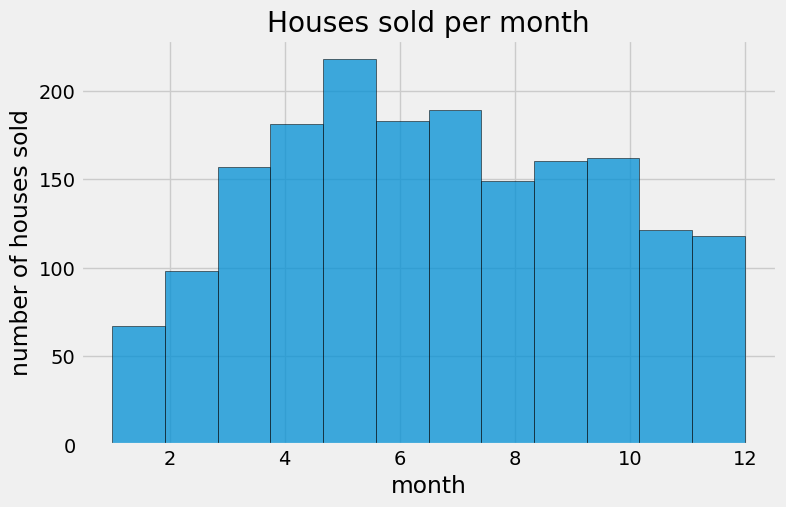

In [72]:
df_hh['month'].plot(kind='hist',xlabel='month', ylabel='number of houses sold', bins=12, alpha=0.75, edgecolor='black', title='Houses sold per month')
plt.savefig('houses_sold_month.jpg', format='jpg')

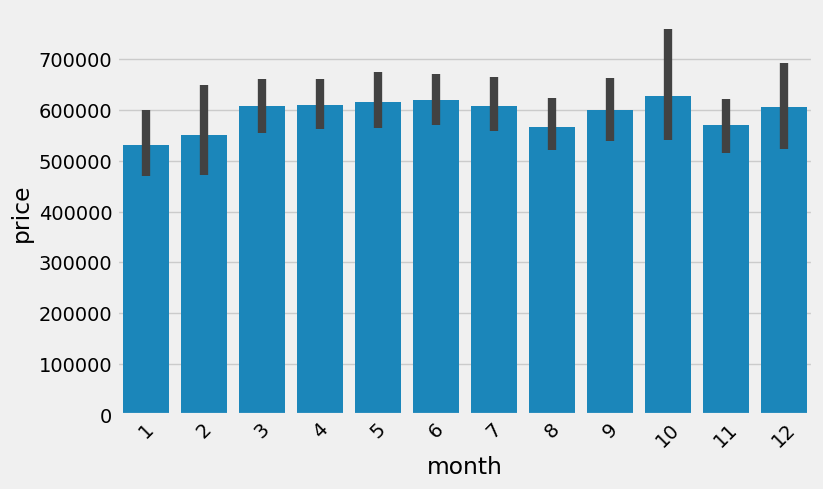

In [ ]:
#  sales prices
fig, ax= plt.subplots()
sns.barplot(data=df_hh, x= 'month', y='price')

ax.tick_params(axis='x', labelrotation=45)
plt.savefig('prices_year.jpg', format='jpg')

The fewest houses are sold in January and February, the most in May. 

In [ ]:
df_hh.query('9.25 < alcohol < 9.5')['residual sugar'].max()

In [ ]:
df_hh.groupby('month').price.mean()

month
1    531,315.21
2    552,088.59
3    607,626.28
4    610,848.11
5    615,878.74
6    620,910.07
7    608,399.83
8    567,774.53
9    599,540.88
10   627,770.00
11   570,486.31
12   607,022.42
Name: price, dtype: float64

In [ ]:
df_hh.groupby('month').price.median()

month
1    520,000.00
2    467,500.00
3    555,000.00
4    570,000.00
5    532,500.00
6    527,000.00
7    548,000.00
8    485,000.00
9    525,000.00
10   526,000.00
11   505,000.00
12   504,500.00
Name: price, dtype: float64

Recommendation: What about renovation?

# TOP HOUSES MAP

In [110]:
avg_latitude = df_hh['lat'].mean() # starting point - exact locations not important
avg_longitude = df_hh['long'].mean()
import geojson
import plotly.express as px
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/refs/heads/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(df_hh, 
                           geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           color='price',
                           mapbox_style="carto-positron",
                           zoom=8, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=400,
                           width=600, 
                          )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2 = px.scatter_mapbox(df_hh[df_hh.zipcode.isin([98004, 98040])], lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
for trace in fig2.data:
    fig.add_trace(trace)
fig.show()

import plotly.io as pio

#fig.write_image("img.png")